In [1]:
import mne
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ---------------- Data Loading and Preprocessing ----------------

# Base path for EEG data files
base_path = r'C:\\Users\\karan\Downloads\\EEG Data\\Data'
subjects = [f'A0{i}' for i in range(1, 10) if i != 4]
event_ids = [7, 8, 9, 10]  # Event IDs for motor imagery tasks: Right Hand, Left Hand, right, Tongue

# Initialize lists to hold data
all_features, all_labels = [], []

# Loop through each subject
for subject in subjects:
    file_path = f'{base_path}\\{subject}T.gdf'
    print(f"Processing {subject}...")

    # Load raw EEG data
    raw = mne.io.read_raw_gdf(file_path, preload=True)
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])  # Drop EOG channels
    raw.set_eeg_reference()  # Set average reference
    raw.filter(8., 30., fir_design='firwin', verbose=False)  # Bandpass filter (8–30 Hz)

    # Apply ICA for artifact removal
    ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
    ica.fit(raw)
    raw = ica.apply(raw)  # Remove artifacts

    # Extract events and epochs
    events, _ = mne.events_from_annotations(raw)
    epochs = mne.Epochs(
        raw, events, event_id=event_ids, tmin=0.5, tmax=4.0, baseline=(0.5, 1.0), preload=True
    )

    # Append features and labels
    all_features.append(epochs.get_data())  # Shape: (n_epochs, n_channels, n_times)
    all_labels.append(epochs.events[:, -1])  # Event IDs (labels)

# Combine data from all subjects
features = np.concatenate(all_features, axis=0)
labels = np.concatenate(all_labels, axis=0)

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")



Processing A01...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 15.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A02...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they 

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 16.0s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A03...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 18.1s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A05...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 20.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A06...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 24.8s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A07...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 15.9s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A08...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 18.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Processing A09...
Extracting EDF parameters from C:\Users\karan\Downloads\EEG Data\Data\A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG,

c:\Users\karan\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 17.9s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 22 PCA components
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 876 original time points ...
0 bad epochs dropped
Features shape: (2304, 22, 876)
Labels shape: (2304,)


Training set shape: (5875, 22, 876, 1)
Testing set shape: (1037, 22, 876, 1)
Training labels shape: (5875,)
Testing labels shape: (1037,)


c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.5152 - loss: 2.1182 - val_accuracy: 0.4819 - val_loss: 1.7586 - learning_rate: 0.0010
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.6184 - loss: 1.2897 - val_accuracy: 0.6020 - val_loss: 1.2464 - learning_rate: 0.0010
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.7273 - loss: 0.9937 - val_accuracy: 0.8129 - val_loss: 0.8858 - learning_rate: 0.0010
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.7885 - loss: 0.9037 - val_accuracy: 0.8458 - val_loss: 0.8324 - learning_rate: 0.0010
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8463 - loss: 0.8323 - val_accuracy: 0.8912 - val_loss: 0.7392 - learning_rate: 0.0010
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.8692 - loss: 0.7847 - val_accuracy: 0.8764 - val_loss: 0.7696 - learning_rate: 0.0010
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.8689 - l

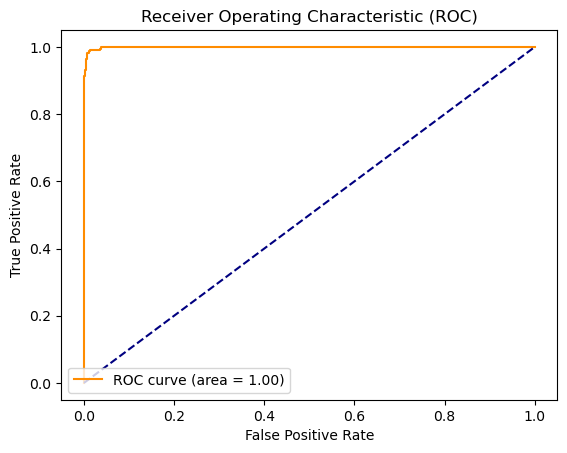

In [2]:
import tensorflow as tf

# ---------------- Data Augmentation Before Splitting ----------------

# Map labels to binary classification: left = 1, Non-left = 0
binary_labels = np.where(labels == 8, 1, 0)  # Event ID for left is 8

# Separate left and Non-left data
left_features = features[binary_labels == 1]
non_left_features = features[binary_labels == 0]

# Oversample left trials to balance the dataset
n_left = len(left_features)
n_non_left = len(non_left_features)
oversampled_left_features = np.tile(left_features, (n_non_left // n_left, 1, 1))
remainder = n_non_left % n_left
if remainder > 0:
    oversampled_left_features = np.concatenate([oversampled_left_features, left_features[:remainder]], axis=0)

# Combine and shuffle the balanced dataset
balanced_features = np.concatenate([oversampled_left_features, non_left_features], axis=0)
balanced_labels = np.concatenate([np.ones(len(oversampled_left_features)), np.zeros(n_non_left)], axis=0)

# Normalize the features (Z-score normalization)
balanced_features = (balanced_features - np.mean(balanced_features, axis=0)) / np.std(balanced_features, axis=0)

# Apply Gaussian noise for data augmentation
noise_factor = 0.05
augmented_features = balanced_features + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=balanced_features.shape)
augmented_features = np.clip(augmented_features, -1.0, 1.0)  # Ensure valid range for EEG signals

# Combine original and augmented data
final_features = np.concatenate((balanced_features, augmented_features))
final_labels = np.concatenate((balanced_labels, balanced_labels))

# Shuffle the final dataset
final_features, final_labels = shuffle(final_features, final_labels, random_state=42)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final_features, final_labels, test_size=0.15, random_state=42)

# Reshape data for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

# ---------------- Build the EEGNet Model ----------------

model = Sequential()

# Temporal Convolution Block
model.add(Conv2D(8, kernel_size=(1, 64), padding='same', input_shape=(22, X_train.shape[2], 1),
                 activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size=(22, 1), depth_multiplier=2, use_bias=False, activation='relu',
                          depthwise_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout for regularization

# Spatial Convolution Block
model.add(SeparableConv2D(16, kernel_size=(1, 16), use_bias=False, padding='same', activation='relu',
                          depthwise_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.4))  # Increased dropout

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ---------------- Training the Model ----------------

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.15,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# ---------------- Evaluate the Model ----------------

# Test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict labels for the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Default threshold 0.5

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------- Plot ROC Curve ----------------

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower left')
plt.show()


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

# Initialize Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store performance metrics for each fold
accuracies = []
roc_aucs = []
confusion_matrices = []

fold = 1
for train_index, val_index in skf.split(final_features, final_labels):
    print(f"\nTraining Fold {fold}/{n_splits}...")
    
    # Split the data into training and validation sets
    X_train, X_val = final_features[train_index], final_features[val_index]
    y_train, y_val = final_labels[train_index], final_labels[val_index]
    
    # Reshape data for CNN input
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    
    # Build the EEGNet model
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(1, 64), padding='same', input_shape=(22, X_train.shape[2], 1),
                     activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(DepthwiseConv2D(kernel_size=(22, 1), depth_multiplier=2, use_bias=False, activation='relu',
                              depthwise_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(SeparableConv2D(16, kernel_size=(1, 16), use_bias=False, padding='same', activation='relu',
                              depthwise_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 4)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    
    # Train the model
    model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[reduce_lr, early_stopping],
        verbose=1
    )
    
    # Evaluate the model on the validation set
    y_val_pred_probs = model.predict(X_val)
    y_val_pred = (y_val_pred_probs > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_probs)
    confusion = confusion_matrix(y_val, y_val_pred)
    
    # Store metrics
    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)
    confusion_matrices.append(confusion)
    
    # Print fold-specific results
    print(f"Fold {fold} Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    
    fold += 1

# Aggregate metrics
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_roc_auc = np.mean(roc_aucs)
std_roc_auc = np.std(roc_aucs)

print("\nCross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean ROC-AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

# Display all confusion matrices
for i, cm in enumerate(confusion_matrices, 1):
    print(f"\nConfusion Matrix for Fold {i}:")
    print(cm)



Training Fold 1/5...


c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.5409 - loss: 2.0491 - val_accuracy: 0.5033 - val_loss: 1.7468 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.6438 - loss: 1.2857 - val_accuracy: 0.6797 - val_loss: 1.2013 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.7616 - loss: 1.0040 - val_accuracy: 0.7780 - val_loss: 0.9830 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.8333 - loss: 0.8287 - val_accuracy: 0.8337 - val_loss: 0.8026 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8686 - loss: 0.7719 - val_accuracy: 0.8568 - val_loss: 0.7775 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.8818 - loss: 0.7560 - val_accuracy: 0.8691 - val_loss: 0.7856 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.8

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.5162 - loss: 1.9894 - val_accuracy: 0.5069 - val_loss: 1.3426 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.6211 - loss: 1.1701 - val_accuracy: 0.6963 - val_loss: 1.0102 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.7528 - loss: 0.9417 - val_accuracy: 0.8040 - val_loss: 0.8476 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.8152 - loss: 0.8328 - val_accuracy: 0.8098 - val_loss: 0.8648 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.8554 - loss: 0.7798 - val_accuracy: 0.8792 - val_loss: 0.7235 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.8720 - loss: 0.7519 - val_accuracy: 0.8785 - val_loss: 0.7324 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.8782 

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.5444 - loss: 1.9154 - val_accuracy: 0.5355 - val_loss: 1.2790 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.7111 - loss: 1.0770 - val_accuracy: 0.6722 - val_loss: 1.0868 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7737 - loss: 0.8304 - val_accuracy: 0.7894 - val_loss: 0.7795 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8241 - loss: 0.7227 - val_accuracy: 0.8531 - val_loss: 0.6819 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8475 - loss: 0.7178 - val_accuracy: 0.8929 - val_loss: 0.6853 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.8525 - loss: 0.7496 - val_accuracy: 0.9067 - val_loss: 0.7054 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.8833 - l

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.5170 - loss: 2.1500 - val_accuracy: 0.5087 - val_loss: 1.8796 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.5472 - loss: 1.3074 - val_accuracy: 0.5781 - val_loss: 1.1545 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.5885 - loss: 1.0170 - val_accuracy: 0.6903 - val_loss: 1.1665 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.7658 - loss: 0.9220 - val_accuracy: 0.7829 - val_loss: 0.9768 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.8324 - loss: 0.8528 - val_accuracy: 0.8444 - val_loss: 0.8424 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.8470 - loss: 0.8306 - val_accuracy: 0.8625 - val_loss: 0.8541 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.8752 - l

c:\Users\karan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5175 - loss: 2.0828 - val_accuracy: 0.5022 - val_loss: 1.7420 - learning_rate: 0.0010
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5491 - loss: 1.2415 - val_accuracy: 0.5434 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6310 - loss: 0.9914 - val_accuracy: 0.7424 - val_loss: 0.8993 - learning_rate: 0.0010
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7396 - loss: 0.8978 - val_accuracy: 0.8155 - val_loss: 0.8116 - learning_rate: 0.0010
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8131 - loss: 0.8519 - val_accuracy: 0.8878 - val_loss: 0.7898 - learning_rate: 0.0010
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8448 - loss: 0.8367 - val_accuracy: 0.8893 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8600 - loss: 0